In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import cv2

from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam

In [4]:
classes = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

In [21]:
X = []
Y = []

for x in classes:
    train_path = 'Training/' + x

    for j in os.listdir(train_path):
        img = cv2.imread(os.path.join(train_path,j),0)
        img = cv2.resize(img,(224,224))
        X.append(img)
        Y.append(classes[x])


In [22]:
X = np.array(X)
Y = np.array(Y)

In [23]:
print(X.shape)
print(Y.shape)

(2870, 224, 224)
(2870,)


In [24]:
value_count = pd.Series(Y).value_counts()
print(value_count)

3    827
1    826
2    822
0    395
Name: count, dtype: int64


In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X.reshape(len(X), -1), Y)

X = X.reshape(-1, 224, 224)


value_count = pd.Series(Y).value_counts()
print(value_count)

0    827
1    827
2    827
3    827
Name: count, dtype: int64


In [26]:
print(X.shape)
print(Y.shape)

(3308, 224, 224)
(3308,)


In [27]:
unique_labels = np.unique(Y)
print(unique_labels)

[0 1 2 3]


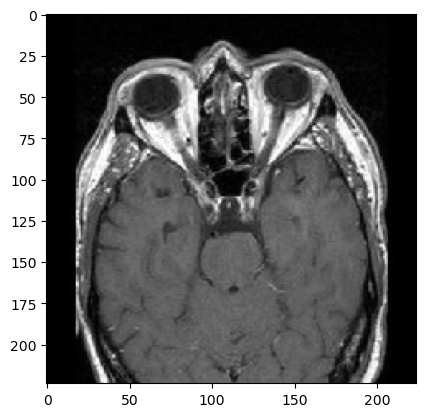

In [28]:
plt.imshow(X[0], cmap='gray')

In [29]:
X_flat = X.reshape(len(X), -1)

In [30]:
print("Original Image:")
print(X[0])
print("\nFlattened Image:")
print(X_flat[0])

Original Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Flattened Image:
[0 0 0 ... 0 0 0]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2646, 50176)
(2646,)
(662, 50176)
(662,)


In [33]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

33.12271081227062 -2.7076218429105574
32.15474298055164 -2.7076218429105574


# SVM

In [37]:
svm = SVC()

In [38]:
svm.fit(X_train,Y_train)

SVC()

In [39]:
train_pred = svm.predict(X_train)

test_pred = svm.predict(X_test)

In [40]:
train_acc = accuracy_score(Y_train,train_pred)
print("Training Accuracy :", train_acc)

Training Accuracy : 0.9614512471655329


In [42]:
test_accuracy_svm = accuracy_score(Y_test, test_pred)
print("Testing Accuracy:", test_accuracy_svm)

Testing Accuracy: 0.8655589123867069


In [46]:
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       178
           1       0.85      0.81      0.83       168
           2       0.77      0.76      0.77       168
           3       0.95      0.95      0.95       148

    accuracy                           0.87       662
   macro avg       0.87      0.87      0.87       662
weighted avg       0.86      0.87      0.86       662



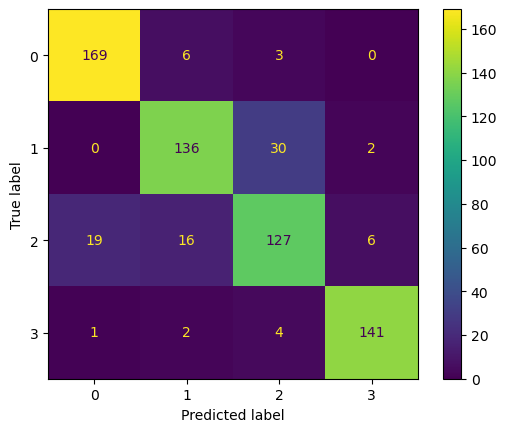

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
conf_mat_svm = confusion_matrix(Y_test, test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_svm)
disp.plot()
plt.show()

In [41]:
from sklearn.svm import SVC
import joblib

# Save the model to a file
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

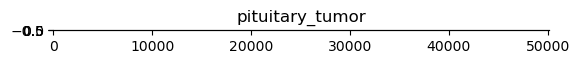

In [63]:
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}
image  = cv2.imread('testimage.jpg',0)
image = cv2.resize(image,(224,224))
image = image.reshape(1, -1) / 255
pred = svm.predict(image)
plt.title(class_label_mapping[pred[0]])
plt.imshow(image, cmap='gray')

# Decision Tree Classifier

In [64]:
dt = DecisionTreeClassifier(random_state=42)

In [65]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
train_pred_dt = dt.predict(X_train)
test_pred_dt = dt.predict(X_test)

In [67]:
train_accuracy_dt = accuracy_score(Y_train, train_pred_dt)
print("Training Accuracy:", train_accuracy_dt)

# Evaluate accuracy on the testing set
test_accuracy_dt = accuracy_score(Y_test, test_pred_dt)
print("Testing Accuracy:", test_accuracy_dt)

Training Accuracy: 1.0
Testing Accuracy: 0.8202416918429003


In [70]:
print("\nDecision Tree Classification Report:")

print(classification_report(Y_test, test_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       178
           1       0.80      0.76      0.78       168
           2       0.70      0.70      0.70       168
           3       0.84      0.91      0.87       148

    accuracy                           0.82       662
   macro avg       0.82      0.82      0.82       662
weighted avg       0.82      0.82      0.82       662



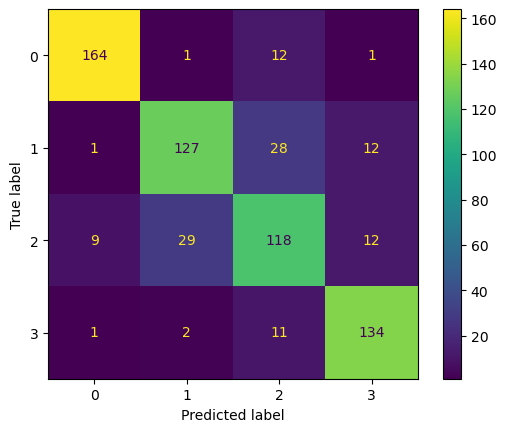

In [78]:
conf_mat_dt = confusion_matrix(Y_test, test_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_dt)
disp.plot()
plt.show()

In [71]:
# Save the model to a file
joblib.dump(dt, 'dt_model.pkl')

['dt_model.pkl']

# Random forest Classifier

In [72]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [73]:
rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [75]:
train_pred_rf = rf.predict(X_train)
test_pred_rf = rf.predict(X_test)

In [76]:
train_accuracy_rf = accuracy_score(Y_train, train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

test_accuracy_rf = accuracy_score(Y_test, test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)

Training Accuracy: 1.0
Testing Accuracy: 0.8957703927492447


In [77]:
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, test_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       178
           1       0.96      0.80      0.87       168
           2       0.82      0.82      0.82       168
           3       0.91      0.97      0.94       148

    accuracy                           0.90       662
   macro avg       0.90      0.90      0.89       662
weighted avg       0.90      0.90      0.89       662



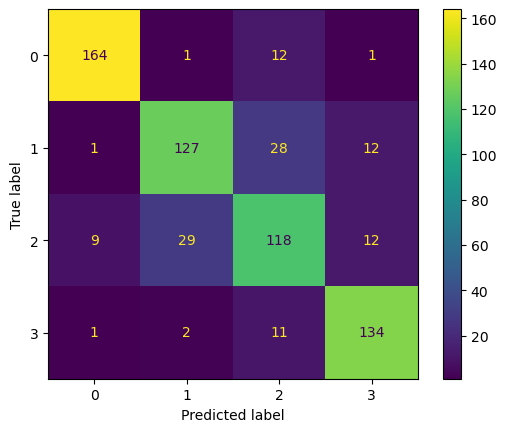

In [79]:
conf_mat_rf = confusion_matrix(Y_test, test_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_rf)
disp.plot()
plt.show()

In [80]:
# Save the model to a file
joblib.dump(dt, 'randomForest_model.pkl')

['randomForest_model.pkl']

# KNN

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)

In [82]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
train_pred_knn = knn.predict(X_train)
test_pred_knn = knn.predict(X_test)

In [84]:
train_accuracy_knn = accuracy_score(Y_train, train_pred_knn)
print("Training Accuracy:", train_accuracy_knn)

test_accuracy_knn = accuracy_score(Y_test, test_pred_knn)
print("Testing Accuracy:", test_accuracy_knn)

Training Accuracy: 0.9459561602418746
Testing Accuracy: 0.8489425981873112


In [85]:
print("\nKNN Classification Report:")
print(classification_report(Y_test, test_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       178
           1       0.81      0.89      0.85       168
           2       0.88      0.63      0.73       168
           3       0.89      0.97      0.93       148

    accuracy                           0.85       662
   macro avg       0.85      0.85      0.85       662
weighted avg       0.85      0.85      0.84       662



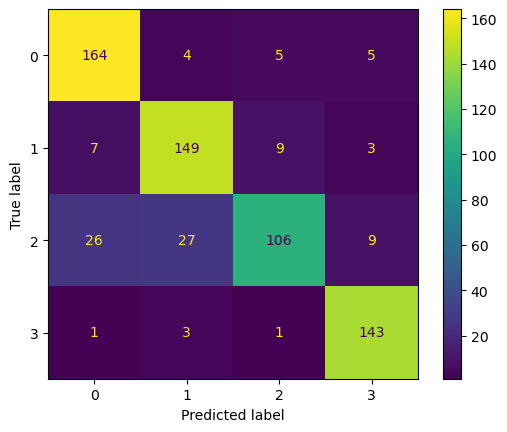

In [86]:
conf_mat_knn = confusion_matrix(Y_test, test_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_knn)
disp.plot()
plt.show()

In [119]:
# Save the model to a file
joblib.dump(dt, 'KNN_model.pkl')

['KNN_model.pkl']

# XGBoost Classifier

In [88]:
xgb_classifier = XGBClassifier()

In [89]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, nthread=-1)

In [90]:
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [91]:
train_pred_xgb = xgb_classifier.predict(X_train)

test_pred_xgb = xgb_classifier.predict(X_test)

In [92]:
train_accuracy_xgb = accuracy_score(Y_train, train_pred_xgb)
print("Training Accuracy:", train_accuracy_xgb)

test_accuracy_xgb = accuracy_score(Y_test, test_pred_xgb)
print("Testing Accuracy:", test_accuracy_xgb)

Training Accuracy: 1.0
Testing Accuracy: 0.9078549848942599


In [93]:
print("\nXGBoost Classification Report:")
print(classification_report(Y_test, test_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       178
           1       0.95      0.87      0.91       168
           2       0.83      0.81      0.82       168
           3       0.94      0.97      0.95       148

    accuracy                           0.91       662
   macro avg       0.91      0.91      0.91       662
weighted avg       0.91      0.91      0.91       662



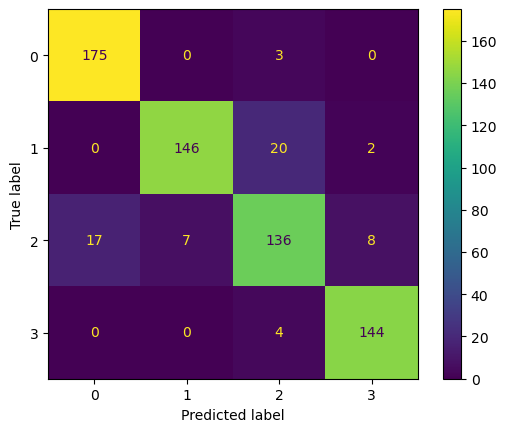

In [126]:
conf_mat_xgb = confusion_matrix(Y_test, test_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_xgb)
disp.plot()
plt.show()

In [120]:
# Save the model to a file
joblib.dump(dt, 'XGBoost.pkl')

['XGBoost.pkl']

# MLP classifier

In [115]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,), 
    max_iter=1,  # We'll manually control the epochs using partial_fit
    solver='adam',  # Using Adam optimizer
    learning_rate_init=0.001,  # Learning rate initialization
    random_state=42, 
)

In [116]:
train_accuracy_list = []
test_accuracy_list = []
epochs = 40
batch_size = 64  # Optional: Adjust batch size if needed


In [113]:
from sklearn.utils import shuffle

In [117]:
for e in range(epochs):
    # Shuffle training data
    X_train, Y_train = shuffle(X_train, Y_train, random_state=42)
    
    # Mini-batch training
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        Y_batch = Y_train[i:i + batch_size]
        mlp.partial_fit(X_batch, Y_batch, classes=np.unique(Y_train))
    
    # Predict on the full training and test set
    train_pred_mlp = mlp.predict(X_train)
    test_pred_mlp = mlp.predict(X_test)

    # Compute training and test accuracy
    train_accuracy = accuracy_score(Y_train, train_pred_mlp)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = accuracy_score(Y_test, test_pred_mlp)
    test_accuracy_list.append(test_accuracy)

    print(f'Epoch {e + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    

Epoch 1/40, Training Accuracy: 0.8473, Test Accuracy: 0.7840
Epoch 2/40, Training Accuracy: 0.9361, Test Accuracy: 0.8746
Epoch 3/40, Training Accuracy: 0.9320, Test Accuracy: 0.8369
Epoch 4/40, Training Accuracy: 0.9747, Test Accuracy: 0.8852
Epoch 5/40, Training Accuracy: 0.9577, Test Accuracy: 0.8565
Epoch 6/40, Training Accuracy: 0.9649, Test Accuracy: 0.8822
Epoch 7/40, Training Accuracy: 0.9845, Test Accuracy: 0.8716
Epoch 8/40, Training Accuracy: 0.9845, Test Accuracy: 0.8625
Epoch 9/40, Training Accuracy: 0.9883, Test Accuracy: 0.8625
Epoch 10/40, Training Accuracy: 0.9853, Test Accuracy: 0.8731
Epoch 11/40, Training Accuracy: 0.9826, Test Accuracy: 0.8792
Epoch 12/40, Training Accuracy: 0.9894, Test Accuracy: 0.8867
Epoch 13/40, Training Accuracy: 0.9906, Test Accuracy: 0.8897
Epoch 14/40, Training Accuracy: 0.9728, Test Accuracy: 0.8580
Epoch 15/40, Training Accuracy: 0.9849, Test Accuracy: 0.8882
Epoch 16/40, Training Accuracy: 0.9887, Test Accuracy: 0.8807
Epoch 17/40, Trai

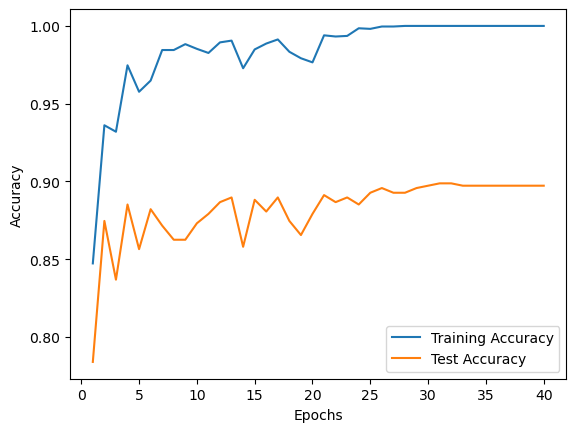

In [118]:
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [121]:
# Save the model to a file
joblib.dump(dt, 'mlp_model.pkl')

['mlp_model.pkl']

In [122]:
train_pred_mlp = mlp.predict(X_train)
test_pred_mlp = mlp.predict(X_test)

In [123]:
train_accuracy_mlp = accuracy_score(Y_train, train_pred_mlp)
print("Training Accuracy:", train_accuracy_mlp)

test_accuracy_mlp = accuracy_score(Y_test, test_pred_mlp)
print("Testing Accuracy:", test_accuracy_mlp)

Training Accuracy: 1.0
Testing Accuracy: 0.8972809667673716


In [124]:
print("\nMLP Classification Report:")
print(classification_report(Y_test, test_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       178
           1       0.86      0.89      0.87       168
           2       0.85      0.79      0.81       168
           3       0.96      0.95      0.96       148

    accuracy                           0.90       662
   macro avg       0.90      0.90      0.90       662
weighted avg       0.90      0.90      0.90       662



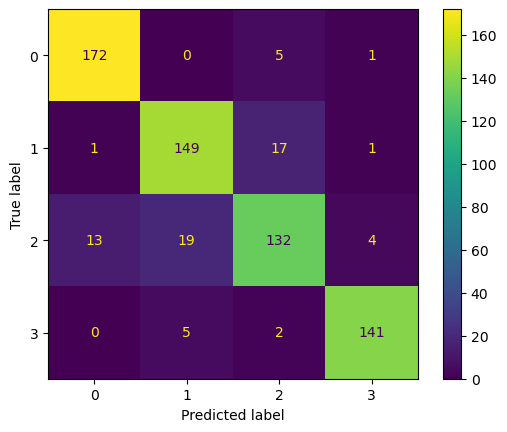

In [127]:
conf_mat_mlp = confusion_matrix(Y_test, test_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_mlp)
disp.plot()
plt.show()

# CNN

In [129]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D, BatchNormalization,Dropout,Input
from keras.models import Sequential

In [131]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [132]:
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_generator = datagen.flow(x_train, y_train, batch_size=32)
val_data_generator = datagen.flow(x_val, y_val, batch_size=32)
     

num_train_images = len(train_data_generator)

num_val_images = len(val_data_generator)

print(f"Number of augmented images in the training set: {num_train_images}")
print(f"Number of augmented images in the validation set: {num_val_images}")

Number of augmented images in the training set: 83
Number of augmented images in the validation set: 21


In [133]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,332 (91.20 MB)

 Trainable params: 23,907,332 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
history = model.fit(train_data_generator, epochs=100, validation_data=val_data_generator)

Epoch 1/100


C:\Users\kusha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 72s 809ms/step - accuracy: 0.3639 - loss: 1.4980 - val_accuracy: 0.6254 - val_loss: 0.9164
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 739ms/step - accuracy: 0.6553 - loss: 0.8285 - val_accuracy: 0.7024 - val_loss: 0.7512
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 755ms/step - accuracy: 0.7367 - loss: 0.6723 - val_accuracy: 0.7523 - val_loss: 0.6161
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 731ms/step - accuracy: 0.7909 - loss: 0.5365 - val_accuracy: 0.7266 - val_loss: 0.6584
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 696ms/step - accuracy: 0.7929 - loss: 0.5201 - val_accuracy: 0.7946 - val_loss: 0.5577
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 703ms/step - accuracy: 0.8027 - loss: 0.4818 - val_accuracy: 0.7855 - val_loss: 0.5471
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 697ms/step - accuracy: 0.8450 - loss: 0.4102 - val_accuracy: 0.7402 - val_loss: 0.5889
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 59s 701ms/step - accuracy: 0.8317 - loss: 0.4134 - val_accuracy

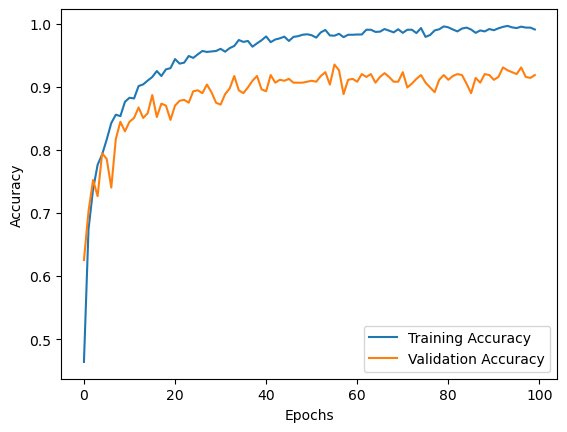

In [136]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [137]:
loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

loss,acc = model.evaluate(val_data_generator)
print("Accuracy on Test Data:",acc)

83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.9892 - loss: 0.0239
Accuracy on Train Data: 0.9920634627342224
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.8989 - loss: 0.5732
Accuracy on Test Data: 0.9063444137573242


In [139]:
joblib.dump(dt, 'cnn_model.pkl')

['cnn_model.pkl']